In [ ]:
from sklearn.metrics import f1_score

# define actual and predicted values as lists or arrays
y_true = [1, 0, 1, 0, 1, 0]
y_pred = [1, 1, 1, 0, 0, 0]

# calculate the F1 score
f1 = f1_score(y_true, y_pred)

# print the F1 score
print('F1 Score:', f1)


In [1]:
import math

def entropy(column):
    """Calculates the entropy of a column of binary values."""
    num_zeros = column.count(0)
    num_ones = column.count(1)
    total = num_zeros + num_ones
    if total == 0:
        return 0
    p0 = num_zeros / total
    p1 = num_ones / total
    if p0 == 0 or p1 == 0:
        return 0
    return -p0 * math.log2(p0) - p1 * math.log2(p1)

column = [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0]
result = entropy(column)
print(result)


0.9182958340544896


In [7]:
import heapq
from collections import namedtuple

# Define a custom class for the Huffman tree nodes
class Node(namedtuple("Node", ["left", "right"])):
    def __lt__(self, other):
        return 0

    def walk(self, code, acc):
        self.left.walk(code, acc + "0")
        self.right.walk(code, acc + "1")

class Leaf(namedtuple("Leaf", ["char", "weight"])):
    def __lt__(self, other):
        return 0

    def walk(self, code, acc):
        code[self.char] = acc or "0"

def huffman_encode(data):
    h = [[weight, Leaf(char, weight)] for char, weight in data.items()]
    heapq.heapify(h)
    while len(h) > 1:
        lo = heapq.heappop(h)
        hi = heapq.heappop(h)
        heapq.heappush(h, [lo[0] + hi[0], Node(lo[1], hi[1])])
    code = {}
    if h:
        [(_weight, root)] = h
        root.walk(code, "")
    return code

# Probabilities of the elements
data = {"a": 0.5, "b": 0.25, "c": 0.125, "d": 0.125}

# Perform Huffman encoding
huff_code = huffman_encode(data)

print("Huffman Encoding: ", huff_code)


Huffman Encoding:  {'a': '0', 'b': '10', 'c': '110', 'd': '111'}


In [8]:
import numpy as np

array1 = np.array([1.2, 3.1, 2.4, 1.7])
array2 = np.array([.5, .06, .9, .3])

dot_product = np.dot(array1, array2)
print(dot_product)


3.4560000000000004


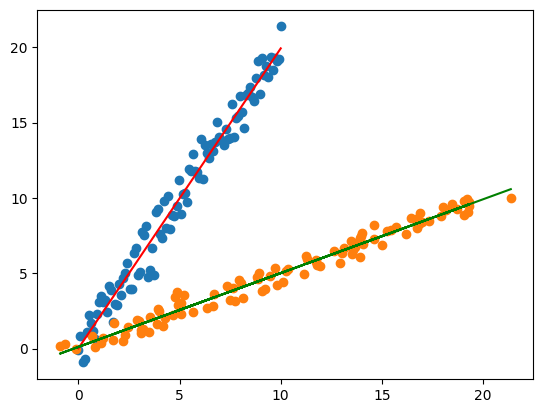

Original R^2: 0.9740599790697467
Swapped R^2: 0.9740599790697467


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create some dummy data
x = np.linspace(0, 10, 100)
y = 2 * x + np.random.normal(0, 1, 100)

# Fit a linear regression model with x as the explanatory variable and y as the response variable
model1 = LinearRegression().fit(x.reshape(-1, 1), y)
r1 = model1.score(x.reshape(-1, 1), y)

# Plot the data and the original regression line
plt.scatter(x, y)
plt.plot(x, model1.predict(x.reshape(-1, 1)), color='red')

# Swap the explanatory and response variables
x_new = y
y_new = x

# Fit a new linear regression model with the swapped variables
model2 = LinearRegression().fit(x_new.reshape(-1, 1), y_new)
r2 = model2.score(x_new.reshape(-1, 1), y_new)

# Plot the swapped data and the new regression line
plt.scatter(x_new, y_new)
plt.plot(x_new, model2.predict(x_new.reshape(-1, 1)), color='green')

plt.show()

print("Original R^2:", r1)
print("Swapped R^2:", r2)


Original Model:
Slope: [1.]
Correlation Coefficient: 0.9872536702688893
SSE: 91.80565635150373
R-Squared: 0.9746698094593926

Swapped Model:
Slope: [1.]
Correlation Coefficient: 0.9872536702688893
SSE: 21.534926301358134
R-Squared: 0.9746698094593926


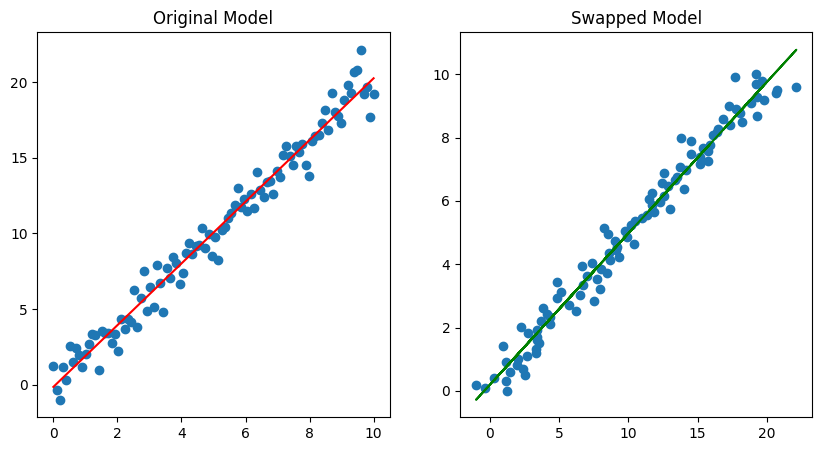

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create some dummy data
x = np.linspace(0, 10, 100)
y = 2 * x + np.random.normal(0, 1, 100)

# Fit a linear regression model with x as the explanatory variable and y as the response variable
model1 = LinearRegression().fit(x.reshape(-1, 1), y)
y_pred1 = model1.predict(x.reshape(-1, 1))
r1 = np.corrcoef(x, y)[0, 1]
sse1 = mean_squared_error(y, y_pred1) * len(y)
r_squared1 = r2_score(y, y_pred1)

# Print the results for the original model
print("Original Model:")
print("Slope:", np.sign(model1.coef_))
print("Correlation Coefficient:", r1)
print("SSE:", sse1)
print("R-Squared:", r_squared1)

# Swap the explanatory and response variables
x_new = y
y_new = x

# Fit a new linear regression model with the swapped variables
model2 = LinearRegression().fit(x_new.reshape(-1, 1), y_new)
y_pred2 = model2.predict(x_new.reshape(-1, 1))
r2 = np.corrcoef(x_new, y_new)[0, 1]
sse2 = mean_squared_error(y_new, y_pred2) * len(y_new)
r_squared2 = r2_score(y_new, y_pred2)

# Print the results for the swapped model
print("\nSwapped Model:")
print("Slope:", np.sign(model2.coef_))
print("Correlation Coefficient:", r2)
print("SSE:", sse2)
print("R-Squared:", r_squared2)

# Plot the original and swapped data and regression lines
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(x, y)
ax1.plot(x, y_pred1, color='red')
ax1.set_title("Original Model")
ax2.scatter(x_new, y_new)
ax2.plot(x_new, y_pred2, color='green')
ax2.set_title("Swapped Model")
plt.show()


In [11]:
import numpy as np

# Define the regression model and the given values
X = np.array([80, 60, 90])
Y_estimated = 100 + 0.1 * X

# Print the estimated Y-values for the given X-values
print("Estimated Y-values:")
for i in range(len(X)):
    print(f"X={X[i]}: Y={Y_estimated[i]}")

# Calculate the R-squared value
R_squared = 0.12

# Check which conclusion does not necessarily follow
if Y_estimated[0] != 108:
    print("Conclusion 1 does not necessarily follow")
elif Y_estimated[1] != 106:
    print("Conclusion 2 does not necessarily follow")
elif R_squared >= 0.7:
    print("Conclusion 3 does not necessarily follow")
elif Y_estimated[2] != 109:
    print("Conclusion 4 does not necessarily follow")
else:
    print("All conclusions follow")


Estimated Y-values:
X=80: Y=108.0
X=60: Y=106.0
X=90: Y=109.0
All conclusions follow
